# Introduction

Graphs are networks consisting of nodes connected by edges or arc. There are two type of graphs: directed graph and undirected graph.

**_Directed graph:_** the connections, or arcs, between nodes have a direction and can only navigate according to the direction.

**_Undirected graph:_** the connections, or edges, have no direction.

Search algorithms in graphs include **finding a path between two nodes, finding the shortest path between two nodes, determining cycles in the graph** (a cycle is a non-empty path from a node to itself), **finding a path that reaches all nodes**, etc.

For example: in informed search, the nodes or arcs of a graph usually have weights or costs associated with them, and it is important to find the cheapest or most optimal path.

# Instruction

## Section A: Dictionary

**1. Dictionary:** Dictionaries are a collection of items in the form of a (key, value) pair. Each item is identified by a key. Unlike lists, dictionaries are unordered sets, which are accessed via keys but not via their position.


In [11]:
#list

list1 = [12.3, 3.4, "Amy", "012-22223333"]
name = list1[2]

# First way to declare a dictionary
student1 = {'name':['James','Bond'],'age':20,'level':'BSc', 'programme':'SF','year':2,'registration_id':'16WAD1234',
           'tel':'0110101010'}

name = student1['name']

#tuple
dict1 = dict([('key', 5.6),('key1', 'Amy')]) #immutable


#Second way to declare a dictionary, as a list of binary tuples
student2 = dict([('name',['Tomy','Hillfigure']),('age','19'),('level','BSc'),('programme','ST'),('year',2),
                 ('registration_id','16WAD5678'),('tel','0191111000')])


#Finish this -----> Display outputs of both the students
print(student1)
print(student2)


{'name': ['James', 'Bond'], 'age': 20, 'level': 'BSc', 'programme': 'SF', 'year': 2, 'registration_id': '16WAD1234', 'tel': '0110101010'}
{'name': ['Tomy', 'Hillfigure'], 'age': '19', 'level': 'BSc', 'programme': 'ST', 'year': 2, 'registration_id': '16WAD5678', 'tel': '0191111000'}


**2. Accessing an element of dictionary:** You can use assigned keys to retrieve a value from a dictionary. With **.items()**, you can also create a list of binary tuples of the items in the dictionary.

In [12]:
# list
list1 = [0,1,2,3,4]
print(list1[4])

#retrieving individual element based on a key
print ('Name:', student1['name'])
print ('Registration ID', student1['registration_id'])
if student1['level'] == 'BSc':
    print ('Programme R' + student1['programme'] + str(student1['year']))
    
#To retrieve individual element into a list of tuples
student1.items()
#----->Finish this 

4
Name: ['James', 'Bond']
Registration ID 16WAD1234
Programme RSF2


dict_items([('name', ['James', 'Bond']), ('age', 20), ('level', 'BSc'), ('programme', 'SF'), ('year', 2), ('registration_id', '16WAD1234'), ('tel', '0110101010')])

**3. Traversing a dictionary:** You can traverse through a dictionary by using a for loop. Remember that with .items(), you would have a list of binary tuples, hence you can unpack them into 2 elements - attribute and value

In [17]:
# for value in  student1:
#     print (value)

for key,value in student1.items():
    print(key, ":", value)
    
# for attribute, value in student1.items():
#     print (attribute, ':\t', value)

name : ['James', 'Bond']
age : 20
level : BSc
programme : SF
year : 2
registration_id : 16WAD1234
tel : 0110101010


# Section B: Creating a graph using List and Dictionary

Assume that we have the following graph as our problem state space: 
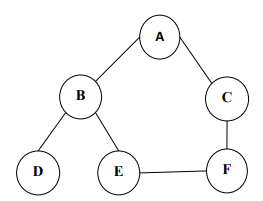

**1. Defining a graph:** Graphs are easily built out of list (or sets) and dictionaries in Python.


In [18]:
"""
Defining a problem state space
The graph is defined with dictionary whose keys are the nodes of the graph.
Graph 1 is defined with List, while graph 2 is defined with sets.
"""

graph1 = {'A': ['B',"C"],
         'B':['A','D','E'],
         'C':['A','F'],
         'D':['B'],
         'E':['B','F'],
         'F':['C','E']}
graph2 = {'A': set(['B','C']),
         'B': set(['A','D','E']),
         'C': set(['A','F']),
         'D': set(['B']),
         'E': set(['B','F']),
         'F': set(['C','E'])}

#----->Finish this 
print(graph1)
print(graph2)

{'A': ['B', 'C'], 'B': ['A', 'D', 'E'], 'C': ['A', 'F'], 'D': ['B'], 'E': ['B', 'F'], 'F': ['C', 'E']}
{'A': {'C', 'B'}, 'B': {'E', 'D', 'A'}, 'C': {'F', 'A'}, 'D': {'B'}, 'E': {'F', 'B'}, 'F': {'E', 'C'}}


**2. Finding a path:** To determine a path between two nodes, write a function that:


a) Takes a graph and the start and end nodes as arguments

b) Returns a list of nodes comprising the path

c) When no path can be found, it returns None.

d) The same node will not occur more than once on the path returned.

e) Tries each possibility in turn until it finds a solution, also known as backtracking.


In [20]:
#the first arg takes a graph, the last arg is needed to form the path
def find_path(graph, start, end,path=[]):
    #print("start = ",start)
    path = path + [start] # combining two list
    #print("path = ",path)
    
    if start == end:
        return path
    if start not in graph: # if the start node is not found in the graph
        return None
    
    #print("graph[start] = ",graph[start])
    for node in graph[start]: #retrieve the child nodes    
        #print("---------------------------------")
        #print("node = ", node)
        if node not in path: # to avoid repeated state
            #recursion is useful in backtracking algorithm
            newpath = find_path(graph,node, end, path)
            if newpath:
                return newpath
    return None

print("Path from B to C = ", find_path(graph2, 'B', 'C'))


Path from B to C =  ['B', 'E', 'F', 'C']


Try finding a path that start = A, end = E

In [22]:
#--> find a path and print
print("Path from A to E = ", find_path(graph1, 'A', 'E'))
print("Path from A to E = ", find_path(graph2, 'A', 'E'))

Path from A to E =  ['A', 'B', 'E']
Path from A to E =  ['A', 'C', 'F', 'E']


### How it works?
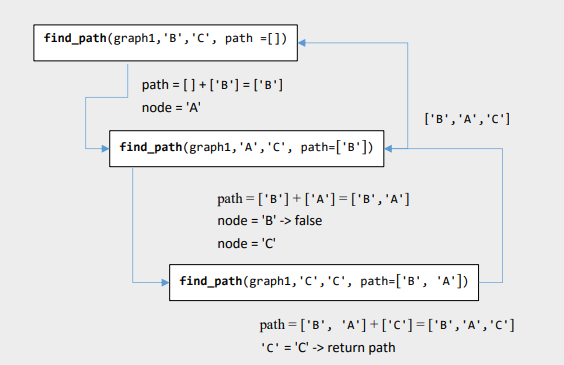

**3. Find all paths:** Sometimes we want to see all the **_alternative_** solutions instead of only the first one we obtain, so that we can also determine the **_shortest_** or **_longest_** path.


In [23]:
def find_all_paths(graph, start, end, path=[]):
    path = path + [start]
    if start == end:
        return [path]
    if start not in graph:
        return []
    paths = []
    for node in graph[start]:
        if node not in path:
            newpaths = find_all_paths(graph,node, end, path)
            #this time the newpath is appended into a list
            for newpath in newpaths:
                paths.append(newpath)
    return paths

find_all_paths(graph1,'B','C')


[['B', 'A', 'C'], ['B', 'E', 'F', 'C']]

Try start = A, end = C

In [ ]:
#--> find a path and print

# Section C: Uninformed Search on a Problem State Space¶

Uninformed search includes **_depth-first search_** and **_breadth-first search_**. Both search algorithms can be used to solve the river crossing problems, The Missionaries and Cannibals with Python. Here are the rules.

Three missionaries and three cannibals must cross a river using a boat which can carry at most **_two_** people, under the constraint that:

a) for both banks, if there are missionaries present on the bank, they cannot be outnumbered by cannibals. If they were, the cannibals would eat the missionaries.

b) The boat cannot cross the river by itself with no people on board.

c) In some variations, one of the cannibals has only one arm and cannow row.


In [24]:
"""
Missionary and Cannibal source code
"""

import math

#______________________________________________________________________________
# Missionaries and Cannibals Problem

# problem definition
class State():
    # States: (cannibalLeft, missionaryLeft, boat, cannibalRight, missionaryRight)
    def __init__(self, cannibalLeft, missionaryLeft, boat, cannibalRight, missionaryRight):
        self.cannibalLeft = cannibalLeft
        self.missionaryLeft = missionaryLeft
        self.boat = boat
        self.cannibalRight = cannibalRight
        self.missionaryRight = missionaryRight
        self.parent = None

    def is_goal(self): # to check whether goal state is reached
        if self.cannibalLeft == 0 and self.missionaryLeft == 0:
            return True
        else:
            return False

    def is_valid(self):
        if self.missionaryLeft >= 0 and self.missionaryRight >= 0 \
                   and self.cannibalLeft >= 0 and self.cannibalRight >= 0 \
                   and (self.missionaryLeft == 0 or self.missionaryLeft >= self.cannibalLeft) \
                   and (self.missionaryRight == 0 or self.missionaryRight >= self.cannibalRight):
            return True
        else:
            return False

    def __eq__(self, other):
        return self.cannibalLeft == other.cannibalLeft and self.missionaryLeft == other.missionaryLeft \
                   and self.boat == other.boat and self.cannibalRight == other.cannibalRight \
                   and self.missionaryRight == other.missionaryRight

    def __hash__(self):
        return hash((self.cannibalLeft, self.missionaryLeft, self.boat, self.cannibalRight, self.missionaryRight))

# Successor function: define the possible movements so that the state is changed.
# Only valid moves will be considered, which is validated by the is_valid() function
def successors(cur_state):
    children = [];
    if cur_state.boat == 'left':
        new_state = State(cur_state.cannibalLeft, cur_state.missionaryLeft - 2, 'right',
                                  cur_state.cannibalRight, cur_state.missionaryRight + 2)
        ## Two missionaries cross left to right.
        if new_state.is_valid():
            new_state.parent = cur_state
            children.append(new_state)
        new_state = State(cur_state.cannibalLeft - 2, cur_state.missionaryLeft, 'right',
                                  cur_state.cannibalRight + 2, cur_state.missionaryRight)
        ## Two cannibals cross left to right.
        if new_state.is_valid():
            new_state.parent = cur_state
            children.append(new_state)
        new_state = State(cur_state.cannibalLeft - 1, cur_state.missionaryLeft - 1, 'right',
                                  cur_state.cannibalRight + 1, cur_state.missionaryRight + 1)
        ## One missionary and one cannibal cross left to right.
        if new_state.is_valid():
            new_state.parent = cur_state
            children.append(new_state)
        new_state = State(cur_state.cannibalLeft, cur_state.missionaryLeft - 1, 'right',
                                  cur_state.cannibalRight, cur_state.missionaryRight + 1)
        ## One missionary crosses left to right.
        if new_state.is_valid():
            new_state.parent = cur_state
            children.append(new_state)
        new_state = State(cur_state.cannibalLeft - 1, cur_state.missionaryLeft, 'right',
                                  cur_state.cannibalRight + 1, cur_state.missionaryRight)
        ## One cannibal crosses left to right.
        if new_state.is_valid():
            new_state.parent = cur_state
            children.append(new_state)
    else:
        new_state = State(cur_state.cannibalLeft, cur_state.missionaryLeft + 2, 'left',
                                  cur_state.cannibalRight, cur_state.missionaryRight - 2)
        ## Two missionaries cross right to left.
        if new_state.is_valid():
            new_state.parent = cur_state
            children.append(new_state)
        new_state = State(cur_state.cannibalLeft + 2, cur_state.missionaryLeft, 'left',
                                  cur_state.cannibalRight - 2, cur_state.missionaryRight)
        ## Two cannibals cross right to left.
        if new_state.is_valid():
            new_state.parent = cur_state
            children.append(new_state)
        new_state = State(cur_state.cannibalLeft + 1, cur_state.missionaryLeft + 1, 'left',
                                  cur_state.cannibalRight - 1, cur_state.missionaryRight - 1)
        ## One missionary and one cannibal cross right to left.
        if new_state.is_valid():
            new_state.parent = cur_state
            children.append(new_state)
        new_state = State(cur_state.cannibalLeft, cur_state.missionaryLeft + 1, 'left',
                                  cur_state.cannibalRight, cur_state.missionaryRight - 1)
        ## One missionary crosses right to left.
        if new_state.is_valid():
            new_state.parent = cur_state
            children.append(new_state)
        new_state = State(cur_state.cannibalLeft + 1, cur_state.missionaryLeft, 'left',
                                  cur_state.cannibalRight - 1, cur_state.missionaryRight)
        ## One cannibal crosses right to left.
        if new_state.is_valid():
            new_state.parent = cur_state
            children.append(new_state)
    return children

def breadth_first_search():
    print ("=== BFS ===")
    initial_state = State(3,3,'left',0,0) # initial state: 3 cannibals and 3 missionaries on the left bank
    if initial_state.is_goal():
        return initial_state
    frontier = list()
    explored = set()
    frontier.append(initial_state)
    while frontier:
        state = frontier.pop(0)
        if state.is_goal():
            return state
        explored.add(state)
        children = successors(state)
        for child in children:
            if (child not in explored) or (child not in frontier):
                frontier.append(child)
    return None

#==============================================================================
def depth_first_search():
    print ("=== DFS ===")
    initial_state = State(3,3,'left',0,0)
    if initial_state.is_goal():
        return initial_state
    frontier = list()
    explored = set()
    frontier.insert(0, initial_state)
    explored.add(initial_state)  #<------------
    while frontier:
        state = frontier.pop(0)
        if state.is_goal():
            return state
        explored.add(state)
            #print "state:", state.cannibalLeft, state.missionaryLeft, state.boat,state.cannibalRight, state.missionaryRight
        children = successors(state)
        for child in children:
            #print "child:", child.cannibalLeft, child.missionaryLeft, child.boat, child.cannibalRight, child.missionaryRight
            if (child not in explored) and (child not in frontier):
                frontier.insert(0,child)
    return None
#==============================================================================


def print_solution(solution): # display the solution path
        path = []
        path.append(solution)
        parent = solution.parent
        while parent:
            path.append(parent)
            parent = parent.parent

        for t in range(len(path)):
            state = path[len(path) - t - 1]
            print ('(',(state.cannibalLeft),"," ,(state.missionaryLeft) \
                              , "," , state.boat , "," ,(state.cannibalRight) , "," , \
                              (state.missionaryRight) , ")")

 
def main():
   
    solution1 = breadth_first_search()
    
    print ("Missionaries and Cannibals solution:")
    print ("cannibalLeft,missionaryLeft,boat,cannibalRight,missionaryRight")
    print_solution(solution1)
    solution2 = depth_first_search()
    print_solution(solution2)
    

# if called from the command line, call main()
if __name__ == "__main__":
    main()


=== BFS ===
Missionaries and Cannibals solution:
cannibalLeft,missionaryLeft,boat,cannibalRight,missionaryRight
( 3 , 3 , left , 0 , 0 )
( 1 , 3 , right , 2 , 0 )
( 2 , 3 , left , 1 , 0 )
( 0 , 3 , right , 3 , 0 )
( 1 , 3 , left , 2 , 0 )
( 1 , 1 , right , 2 , 2 )
( 2 , 2 , left , 1 , 1 )
( 2 , 0 , right , 1 , 3 )
( 3 , 0 , left , 0 , 3 )
( 1 , 0 , right , 2 , 3 )
( 1 , 1 , left , 2 , 2 )
( 0 , 0 , right , 3 , 3 )
=== DFS ===
( 3 , 3 , left , 0 , 0 )
( 2 , 2 , right , 1 , 1 )
( 2 , 3 , left , 1 , 0 )
( 0 , 3 , right , 3 , 0 )
( 1 , 3 , left , 2 , 0 )
( 1 , 1 , right , 2 , 2 )
( 2 , 2 , left , 1 , 1 )
( 2 , 0 , right , 1 , 3 )
( 3 , 0 , left , 0 , 3 )
( 1 , 0 , right , 2 , 3 )
( 2 , 0 , left , 1 , 3 )
( 0 , 0 , right , 3 , 3 )
